In [18]:
import pymysql
import pandas as pd
import numpy as np

In [2]:
conn=pymysql.connect(host='mysql-backup.shanzhen.me',
                     user='readonly_medicine_liuqq',
                     password="r3g1^QWgV8GeYJw4",
                     database='asgard_dataplatform',
                     port= 3001,
                     charset='utf8')

In [3]:
sqlstr='SELECT p1.ORDER_CODE,p1.RESULT,p1.UPPER_VALUE,p1.LOWER_VALUE,p2.EXAM_DATE,p2.EXAMINEE_AGE,p2.EXAMINEE_GENDER \
    FROM (SELECT * FROM t66_athena_basic_quantity_record WHERE SZ_STATUS = 1 AND SD_CODE = "S0000418N99") p1 \
    LEFT JOIN (SELECT * FROM t66_athena_basic_raw_person_info WHERE SZ_STATUS = 1)p2 ON p1.ORDER_CODE = p2.ORDER_CODE ' 

SBP=pd.DataFrame()
for i in range(0,30):
    limitstr='limit '+str(i*200000)+",200000"
    sqlstrfull=sqlstr+limitstr
    tagsub=pd.read_sql(sqlstrfull,con=conn)
    SBP=SBP.append(tagsub)

In [3]:
SBP = pd.read_pickle(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\SBP\20201130.SBP_Recode.pkl")

In [4]:
SBP_Recode1 = SBP.copy()

In [6]:
SBP_Recode1 = SBP_Recode1.dropna(subset = ['EXAM_DATE','EXAMINEE_AGE','RESULT',"EXAMINEE_GENDER"])

In [7]:
from datetime import datetime

In [8]:
SBP_Recode = SBP_Recode1.loc[(SBP_Recode1['EXAM_DATE']>datetime(2015,1,2,23,59)) & (SBP_Recode1['EXAM_DATE']<datetime(2021,12,1,0,0))]

### 数据展现

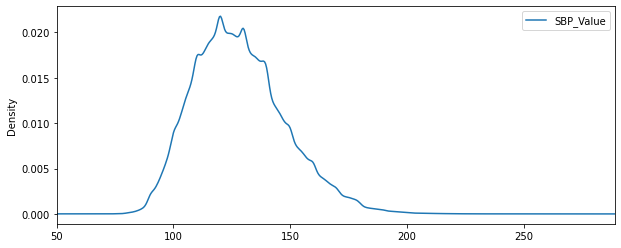

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))
SBP_Recode.RESULT.dropna().plot(kind='kde', xlim=(min(SBP_Recode.RESULT)-10,max(SBP_Recode.RESULT)+10),label = "SBP_Value")
plt.legend()
plt.show()

In [65]:
SBP_Recode

,ORDER_CODE,RESULT,UPPER_VALUE,LOWER_VALUE,EXAM_DATE,EXAMINEE_AGE,EXAMINEE_GENDER
0,606898462371,124.0,NaN,NaN,2020-02-29 00:00:00,73.0,M
1,485194753251,138.0,NaN,NaN,2020-01-12 00:00:00,60.0,MW
2,064707165127,154.0,NaN,NaN,2020-01-13 00:00:00,73.0,M
3,074452138242,136.0,NaN,NaN,2020-01-14 00:00:00,48.0,MW
4,016056732550,100.0,NaN,NaN,2020-01-11 00:00:00,51.0,MW
...,...,...,...,...,...,...,...
51884,5ki59ymwdgqr8ph,149.0,139.99,90.0,2020-11-27 00:00:00,39.0,M
51885,5ki59yn9zz3gxfl,139.0,139.99,90.0,2020-11-26 00:00:00,47.0,MW
51886,5ki5a5luxs6lyps,112.0,140.00,90.0,2020-11-30 11:38:25,NaN,None
51887,5ki5a5mbepa9tkt,114.0,140.00,90.0,2020-11-30 15:05:14,32.0,M


In [10]:
SBP_Recode['EXAM_DATE'] = pd.to_datetime(SBP_Recode['EXAM_DATE'])

C:\Users\13670\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
SBP_Recode = SBP_Recode.set_index('EXAM_DATE')

In [73]:
SBP_Recode.axes

[DatetimeIndex(['2020-02-29 00:00:00', '2020-01-12 00:00:00',
                '2020-01-13 00:00:00', '2020-01-14 00:00:00',
                '2020-01-11 00:00:00', '2020-01-09 00:00:00',
                '2020-01-04 00:00:00', '2020-01-09 00:00:00',
                '2020-01-08 00:00:00', '2020-01-11 00:00:00',
                ...
                '2020-11-26 00:00:00', '2020-11-26 00:00:00',
                '2020-11-27 00:00:00', '2020-11-26 00:00:00',
                '2020-11-27 00:00:00', '2020-11-27 00:00:00',
                '2020-11-26 00:00:00', '2020-11-30 11:38:25',
                '2020-11-30 15:05:14', '2020-11-30 14:46:07'],
               dtype='datetime64[ns]', name='EXAM_DATE', length=1451816, freq=None),
 Index(['ORDER_CODE', 'RESULT', 'UPPER_VALUE', 'LOWER_VALUE', 'EXAMINEE_AGE',
        'EXAMINEE_GENDER'],
       dtype='object')]

In [74]:
SBP_W = pd.DataFrame(SBP_Recode.RESULT.resample("W").agg([len,np.mean]))
SBP_D = pd.DataFrame(SBP_Recode.RESULT.resample("D").agg([len,np.mean]))

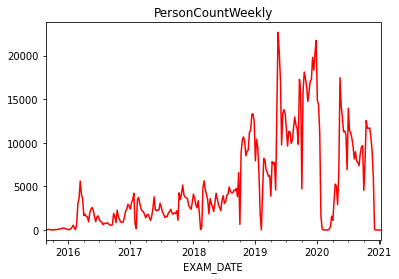

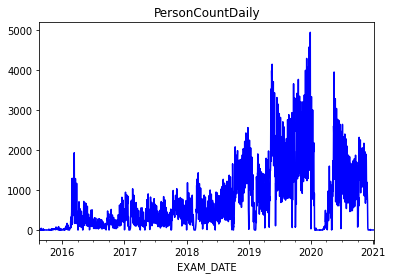

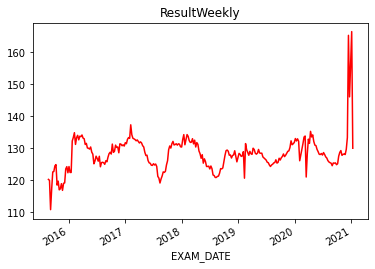

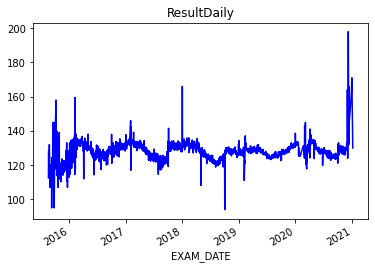

In [75]:
import matplotlib.pyplot as plt

data = [SBP_W["len"],SBP_D["len"],SBP_W["mean"],SBP_D["mean"]]
color = ["red","blue","red","blue"]
title = ["PersonCountWeekly","PersonCountDaily","ResultWeekly","ResultDaily"]

for i in range(0,4):
    data[i].dropna().plot(color = color[i])
    plt.title(title[i])
    plt.show()

In [76]:
SBP_D2015 = SBP_D.loc[SBP_D.index.year == 2015,:]
SBP_D2020 = SBP_D.loc[SBP_D.index.year == 2020,:]

<AxesSubplot:xlabel='EXAM_DATE'>

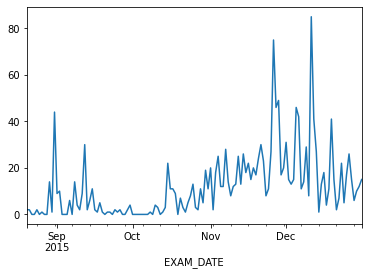

In [77]:
SBP_D2015["len"].plot()

<AxesSubplot:xlabel='EXAM_DATE'>

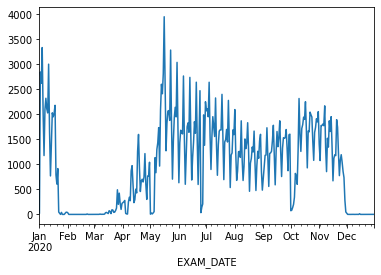

In [78]:
SBP_D2020["len"].plot()

In [12]:
SBP_Select = SBP_Recode.loc[~SBP_Recode.index.year.isin([2015,2020,2021]),:]

In [14]:
SBP_Select.to_pickle(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\SBP\20201130.SBP_Select.pkl")

In [13]:
SBP_S_W = pd.DataFrame(SBP_Select.RESULT.resample("W").agg([len,np.mean]))
SBP_S_D = pd.DataFrame(SBP_Select.RESULT.resample("D").agg([len,np.mean]))

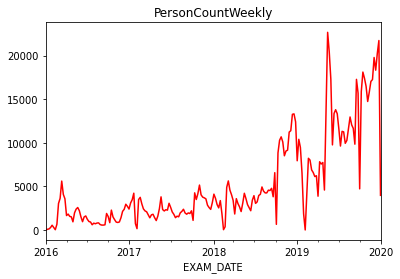

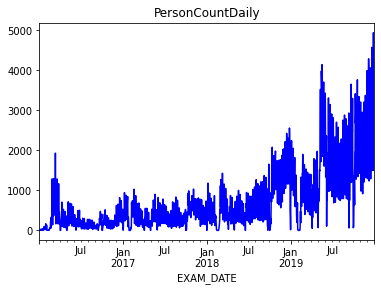

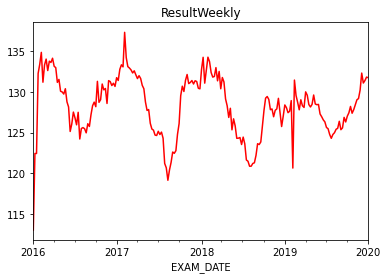

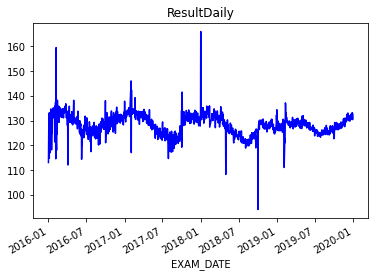

In [86]:
import matplotlib.pyplot as plt

data = [SBP_S_W["len"],SBP_S_D["len"],SBP_S_W["mean"],SBP_S_D["mean"]]
color = ["red","blue","red","blue"]
title = ["PersonCountWeekly","PersonCountDaily","ResultWeekly","ResultDaily"]

for i in range(0,4):
    data[i].dropna().plot(color = color[i])
    plt.title(title[i])
    plt.show()

### 年龄、性别对血压的影响

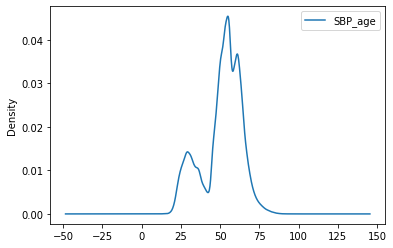

In [104]:
SBP_Select.EXAMINEE_AGE.plot(kind = "kde",label = "SBP_age")
plt.legend()
plt.show()

In [88]:
set(SBP_Recode1.EXAMINEE_GENDER)

{'M', 'MW', None, 'UW'}

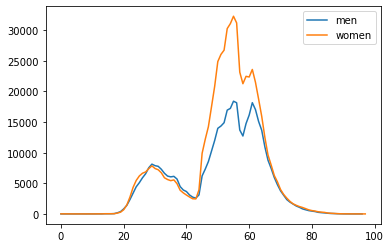

In [105]:
SBP_men = SBP_Select.loc[SBP_Select.EXAMINEE_GENDER == "M",:]
SBP_men_age = pd.DataFrame(SBP_men.groupby(['EXAMINEE_AGE'])['RESULT'].agg([len,np.mean]))

SBP_women = SBP_Select.loc[~SBP_Select.EXAMINEE_GENDER.isin(["M"]),:]
SBP_women_age = pd.DataFrame(SBP_women.groupby(['EXAMINEE_AGE'])['RESULT'].agg([len,np.mean]))

plt.plot(SBP_men_age.len,label = "men")
plt.plot(SBP_women_age.len,label = "women")
plt.legend()

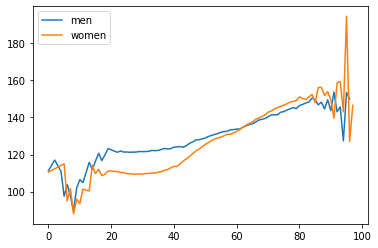

In [106]:
SBP_men = SBP_Select.loc[SBP_Select.EXAMINEE_GENDER == "M",:]
SBP_men_age = pd.DataFrame(SBP_men.groupby(['EXAMINEE_AGE'])['RESULT'].mean())

SBP_women = SBP_Select.loc[~SBP_Select.EXAMINEE_GENDER.isin(["M"]),:]
SBP_women_age = pd.DataFrame(SBP_women.groupby(['EXAMINEE_AGE'])['RESULT'].mean())

plt.plot(SBP_men_age,label = "men")
plt.plot(SBP_women_age,label = "women")
plt.legend()

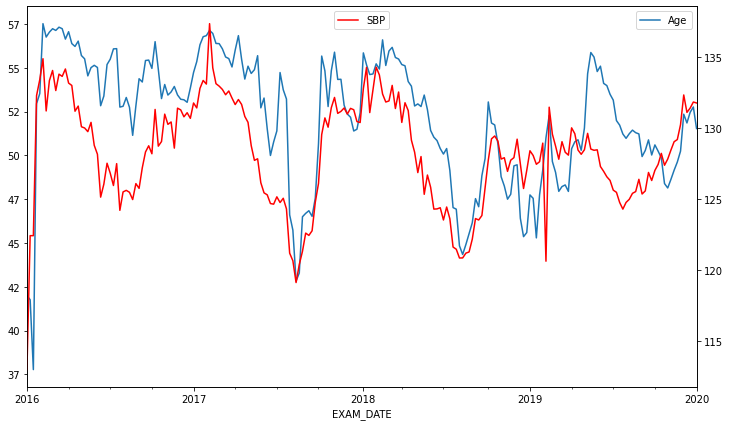

In [103]:
SBP_W_age = pd.DataFrame(SBP_Select.EXAMINEE_AGE.resample("W").agg([len,np.mean]))
SBP_W_result = pd.DataFrame(SBP_Select.RESULT.resample("W").agg([len,np.mean]))

from matplotlib.ticker import FuncFormatter

fig,ax=plt.subplots(1,1,figsize=(9,6))
ax1 = ax.twinx()

@FuncFormatter
def format(x,pos):
    return '%d'%x

ax.yaxis.set_major_formatter(format)
ax1.yaxis.set_major_formatter(format)


SBP_W_result["mean"].dropna().plot(ax=ax1,figsize=(12,6),style=['r-'])
ax1.legend(('SBP',),loc = 'upper center')

SBP_W_age["mean"].dropna().plot(ax=ax,figsize=(12,7)) 
ax.legend(('Age',))

### 截面分析

Text(0.5, 1.0, 'SBP & Age(Month)')

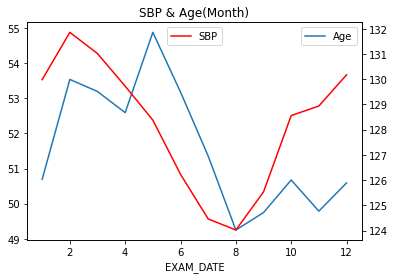

In [108]:
SBP_Month = pd.DataFrame(SBP_Select.groupby([SBP_Select.index.month])["RESULT"].mean())
SBP_Month_Age = pd.DataFrame(SBP_Select.groupby([SBP_Select.index.month])["EXAMINEE_AGE"].mean())

fig,ax=plt.subplots(1,1,figsize=(6,3))
ax1 = ax.twinx()

@FuncFormatter
def format(x,pos):
    return '%d'%x

ax.yaxis.set_major_formatter(format)
ax1.yaxis.set_major_formatter(format)


SBP_Month.dropna().plot(ax=ax1,figsize=(6,3),style=['r-'])
ax1.legend(('SBP',),loc = 'upper center')

SBP_Month_Age.dropna().plot(ax=ax,figsize=(6,4)) 
ax.legend(('Age',))
plt.title("SBP & Age(Month)")

In [113]:
bins = [0,20,80,100]
bins_label = ["young(<20)","adult(20-80)","senior(>80)"]
SBP_Select["Age_label"] = pd.cut(SBP_Select['EXAMINEE_AGE'],bins = bins, labels = bins_label)

C:\Users\13670\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
SBP_Y= pd.DataFrame(SBP_Select.loc[SBP_Select.Age_label == "young(<20)","RESULT"])
SBP_Y = pd.DataFrame(SBP_Y.RESULT.resample('W').agg([len,sum,np.mean]))

SBP_A = pd.DataFrame(SBP_Select.loc[SBP_Select.Age_label == "adult(20-80)","RESULT"])
SBP_A = pd.DataFrame(SBP_A.RESULT.resample("W").agg([len,sum,np.mean]))

SBP_S = pd.DataFrame(SBP_Select.loc[SBP_Select.Age_label == "senior(>80)","RESULT"])
SBP_S = pd.DataFrame(SBP_S.RESULT.resample("W").agg([len,sum,np.mean]))

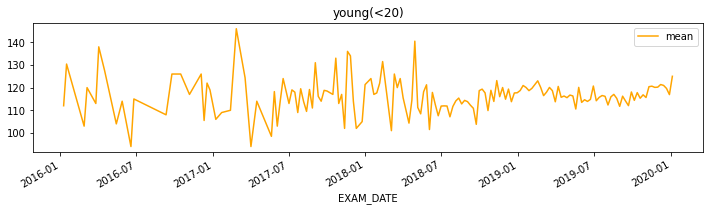

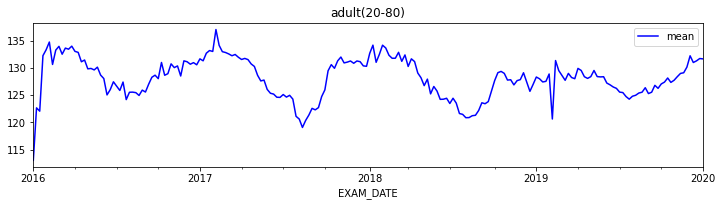

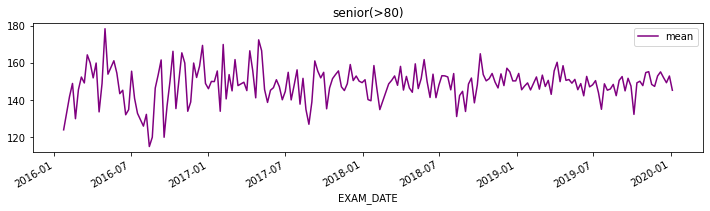

In [115]:
data = [SBP_Y,SBP_A,SBP_S]
colors = ["orange","blue","purple"]
title= ["young(<20)","adult(20-80)","senior(>80)"]

for i in range(0,3):
    plt.figure(figsize = (12,9))
    ax = plt.subplot(3,1,i+1)
    data[i]["mean"].dropna().plot(ax = ax, color = colors[i])
    plt.title(title[i])
    plt.legend()
    plt.show()

### 按年龄标化

<AxesSubplot:ylabel='Density'>

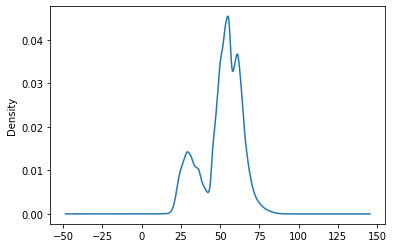

In [117]:
SBP_Select.EXAMINEE_AGE.plot(kind= "kde",label = "EXAMINEE_AGE")

<AxesSubplot:xlabel='EXAM_DATE'>

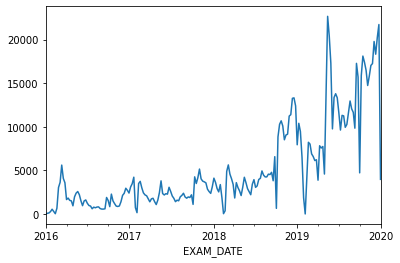

In [119]:
SBP_S_W.len.plot()

In [120]:
SBP_S_W.sort_values(by = "len",ascending = False )

,len,mean
EXAM_DATE,,
2019-05-19,22685.0,128.512189
2019-12-29,21745.0,131.821844
2019-05-26,20438.0,128.426754
2019-12-22,20255.0,131.394964
2019-12-08,19799.0,132.317693
...,...,...
2016-01-10,83.0,122.421687
2018-02-18,39.0,132.384615
2016-02-14,36.0,131.194444


In [15]:
SBP_S_SM = pd.DataFrame(SBP_Select.RESULT.resample('SM').agg([len,np.mean]))

In [16]:
DateNodeList = SBP_S_SM.index.tolist()
DateNodeList.insert(0,"2016-01-01")

In [17]:
AgeBins = [20,25,30,35,40,45,50,55,60,65,70,75,80]
SBP_Select_age_cut = pd.DataFrame(pd.cut(SBP_Select["EXAMINEE_AGE"],bins = AgeBins,include_lowest = True))
SBP_Select_age_count = pd.DataFrame(SBP_Select_age_cut.groupby(['EXAMINEE_AGE'])['EXAMINEE_AGE'].count())
SBP_Select_age_count.columns = ["count"]
SBP_Select_age_count["percentage"] = (SBP_Select_age_count['count']/SBP_Select_age_count['count'].sum(axis = 0))

In [18]:
DateList = []
AdjustSBPList = []

#def Get_AdjustRate()
for i in range(1,len(DateNodeList)):
    T1 = pd.to_datetime(DateNodeList[i-1])
    T2 = pd.to_datetime(DateNodeList[i])    
    data = SBP_Select[(SBP_Select.index >=T1) & (SBP_Select.index <= T2)]
    data_age_cut = pd.DataFrame(pd.cut(data['EXAMINEE_AGE'],bins = AgeBins,include_lowest = True))
    data_age_cut["RESULT"] = data.RESULT
    Data = pd.DataFrame(data_age_cut.groupby(['EXAMINEE_AGE'])["RESULT"].mean())
    Data = Data.join(SBP_Select_age_count)
    Data["SBP"] = Data['RESULT']* Data['percentage']
    Data["SBP"] = Data["SBP"].fillna(method='bfill')    
    AdjustSBP = Data["SBP"].sum(axis = 0)
    Data["AdjustSBP"] = Data["SBP"].sum(axis = 0)
    Data["Date1"] = T1
    Data["Date1_"] =  Data["Date1"].dt.date
    Data["Date2"] = T2
    Data["Date2_"] = Data["Date2"].dt.date
#     Data['Date'] = Data.Date1_.dt.date.str.cat(Data.Date2_.dt.date,',',na_rep = "Missing")
#     DateList.append(set(Data["Date2"].dt.date))
    DateList.append(T2)
    AdjustSBPList.append(AdjustSBP)
AdjustSBP = pd.DataFrame({"Date":DateList,"Adjust_SBP":AdjustSBPList})
AdjustSBP = AdjustSBP.set_index("Date")

In [19]:
AdjustSBP = AdjustSBP.iloc[1:]

In [20]:
AdjustSBP.to_excel(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\SBP\20201130.AdjustSBP.xlsx")

<AxesSubplot:xlabel='EXAM_DATE'>

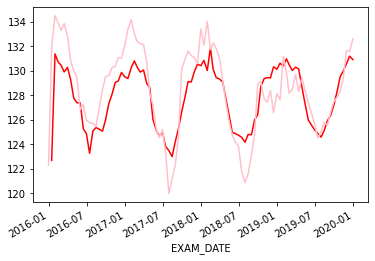

In [133]:
AdjustSBP['Adjust_SBP'].plot(color = 'red')
SBP_S_SM["mean"].plot(color = "pink")

### 时序分析

In [2]:
AdjustSBP = pd.read_excel(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\SBP\20201130.AdjustSBP.xlsx")

In [3]:
AdjustSBP['Date'] = pd.to_datetime(AdjustSBP['Date'])
AdjustSBP = AdjustSBP.set_index("Date")

In [4]:
AdjustSBP

,Adjust_SBP
Date,
2016-01-15,122.669921
2016-01-31,131.366159
2016-02-15,130.708772
2016-02-29,130.439663
2016-03-15,129.893710
...,...
2019-10-31,129.528309
2019-11-15,129.984192
2019-11-30,130.557510


In [19]:
from scipy import stats
import statsmodels.api as sm  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
# 1.平稳性检验 单位根检验（ADF、DF、PP） 如果序列是平稳的，则不存在单位根， 否则就会存在单位根
from statsmodels.tsa.stattools import adfuller

adfuller(AdjustSBP) 

(-5.193122032046838,
 9.080848013395454e-06,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 162.29687275106056)

<Figure size 432x288 with 0 Axes>

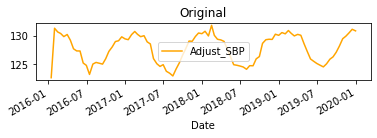

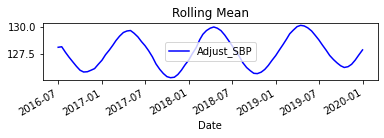

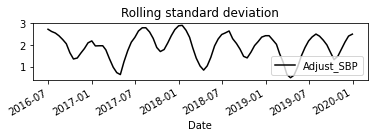

In [136]:
def draw_trend(timeseries, size):
    f = plt.figure(facecolor='white')
    rol_mean = timeseries.rolling(window=size).mean()
    rol_std = timeseries.rolling(window=size).std()
    
    data = [timeseries,rol_mean,rol_std]
    colors = ["orange","blue","black"]
    title= ['Original','Rolling Mean','Rolling standard deviation']

    plt.figure()
    for i in range(0,3):
        ax = plt.subplot(3,1,i+1)
        data[i].dropna().plot(ax = ax, color = colors[i])
        plt.title(title[i])
        plt.legend()
        plt.show()

draw_trend(AdjustSBP,12)

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:496: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


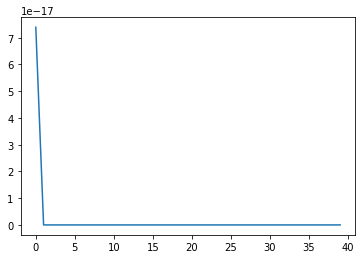

In [8]:
# 2.白噪声检验（纯随机性检验）, 白噪声序列，随机产生的序列，不具有时间上的相关性
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test

# p_value = acorr_ljungbox(AdjustSBP, lags=1) 
# print (p_value)

plt.plot(lb_test(AdjustSBP)[1])

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


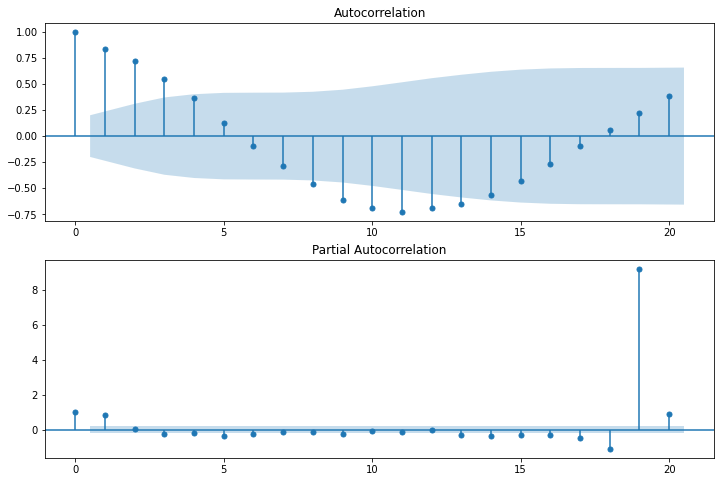

In [138]:
# 3.时间序列定阶
## 3.1 ACF和PACF定阶

fig = plt.figure(figsize=(12, 8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(AdjustSBP,ax=ax1)

ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(AdjustSBP,ax=ax2)

In [6]:
## 3.2 根据ARMA拟合效果定阶
def Resampling(timeserise): 
    df = timeserise
    data = df['2016-1-1':'2019-01-01'] 
    test = df['2019-01-01':'2019-12-31']
    data_train = data.resample('SM').mean()  
    data_test = test.resample('SM').mean()
 
    return data_train,data_test

data_train,data_test = Resampling(AdjustSBP)

In [146]:
data_train

,Adjust_SBP
Date,
2016-01-15,122.669899
2016-01-31,131.367207
2016-02-15,130.710453
2016-02-29,130.440857
2016-03-15,129.894742
...,...
2018-10-31,129.351518
2018-11-15,129.430970
2018-11-30,129.404059


In [20]:
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.arima_model import ARMA

from statsmodels.stats.stattools import durbin_watson 
from statsmodels.graphics.api import qqplot

import sklearn.metrics
import matplotlib.pyplot as plt
import itertools

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\stat

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
C:\Users\13670\Anaconda3\

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

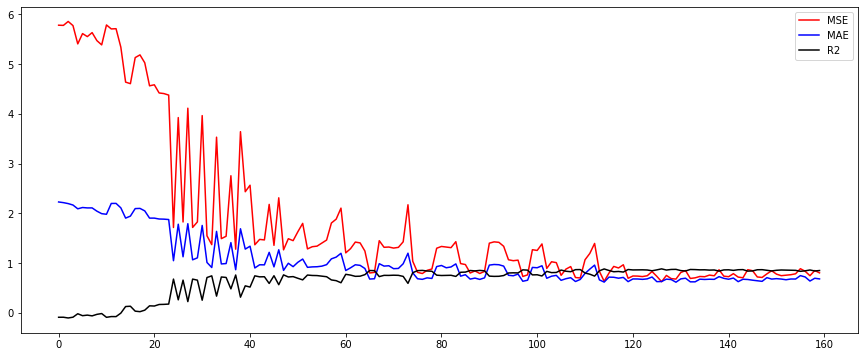

In [29]:
p_value = []
q_value = []
MSEList = []
MAEList= []
R2List = []

p_min = 0
q_min = 0
p_max = 20
q_max = 20

for p,q in itertools.product(range(p_min,p_max+1),range(q_min,q_max+1)):

    arma_model = ARMA(data_train,(p,q))
    try:
        result = arma_model.fit(disp=-1, method='css')
    except:
        continue 
    pred = result.predict()
    pred_one = result.predict(start= "2019-01-01",end =" 2019-12-31", \
                      dynamic=True)

    data_test_result = data_test['Adjust_SBP'].values
    pred_one_result = pred_one.values
 
    MSE = sklearn.metrics.mean_squared_error(data_test_result,pred_one_result)
    MAE = sklearn.metrics.mean_absolute_error(data_test_result,pred_one_result)
    R2 = sklearn.metrics.r2_score(data_test_result,pred_one_result)

    MSEList.append(MSE)
    MAEList.append(MAE)
    R2List.append(R2)
    p_value.append(p)
    q_value.append(q)

       
df = pd.DataFrame({'p':p_value,'q':q_value,'MSE':MSEList,'MAE':MAEList,'R2':R2List})

plt.figure(figsize=(15,6))
plt.plot(MSEList,'r',label='MSE')
plt.plot(MAEList,'b',label='MAE')
plt.plot(R2List,'k',label='R2')
plt.legend(loc=0) 
                  
MSE_min = df.loc[df.MSE== df.MSE.min(),:]
MAE_min = df.loc[df.MAE== df.MAE.min(),:]
R2_max = df.loc[df.R2== df.R2.max(),:]

In [30]:
MSE_min

,p,q,MSE,MAE,R2
126,18,8,0.62398,0.627733,0.882237


In [31]:
MAE_min

,p,q,MSE,MAE,R2
129,18,11,0.676433,0.61389,0.872338


In [33]:
R2_max = df.loc[df.R2== df.R2.max(),:]
R2_max

,p,q,MSE,MAE,R2
126,18,8,0.62398,0.627733,0.882237


In [ ]:
# 3.信息准则

#AIC
AIC = sm.tsa.arma_order_select_ic(AdjustSBP,\
    max_ar=20,max_ma=20,ic='aic')['aic_min_order']
#BIC
BIC = sm.tsa.arma_order_select_ic(AdjustSBP,max_ar=20,\
       max_ma=20,ic='bic')['bic_min_order']
#HQIC
HQIC = sm.tsa.arma_order_select_ic(AdjustSBP,max_ar=20,\
             max_ma=20,ic='hqic')['hqic_min_order']

print('the AIC is{},\nthe BIC is{}\n the HQIC is{}'.format(AIC,BIC,HQIC))

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Converg

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


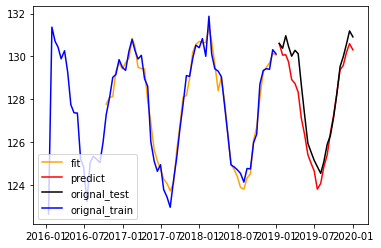

In [46]:
arma_model = ARMA(data_train,(18,8))
result = arma_model.fit(disp=-1, method='css')
pred = result.predict()
pred_two = result.predict(start= "2019-01-01",end =" 2019-12-31", \
                  dynamic=True)

plt.plot(pred,color = "orange",label = "fit")
plt.plot(pred_two,color = "red", label = "predict")
plt.plot(data_test,color = "black",label = "orignal_test")
plt.plot(data_train,color = "blue", label = "orignal_train")
plt.legend(loc=0)

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


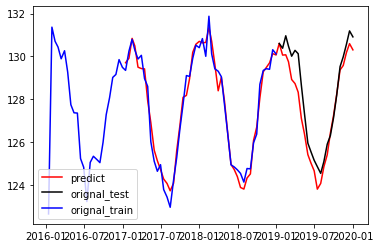

In [32]:
arma_model = ARMA(data_train,(18,8))
result = arma_model.fit(disp=-1, method='css')
pred = result.predict()
pred_two = result.predict(start= "2017-01-15",end =" 2019-12-31")

plt.plot(pred_two,color = "red", label = "predict")
plt.plot(data_test,color = "black",label = "orignal_test")
plt.plot(data_train,color = "blue", label = "orignal_train")
plt.legend(loc=0)

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


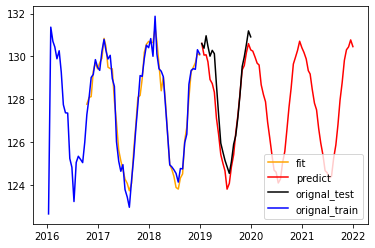

In [14]:
arma_model = ARMA(data_train,(18,8))
result = arma_model.fit(disp=-1, method='css')
pred = result.predict()
pred_two = result.predict(start= "2019-01-01",end =" 2021-12-31")

plt.plot(pred,color = "orange",label = "fit")
plt.plot(pred_two,color = "red", label = "predict")
plt.plot(data_test,color = "black",label = "orignal_test")
plt.plot(data_train,color = "blue", label = "orignal_train")
plt.legend(loc=0)

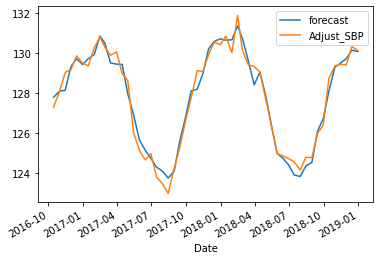

In [47]:
fig = result.plot_predict()

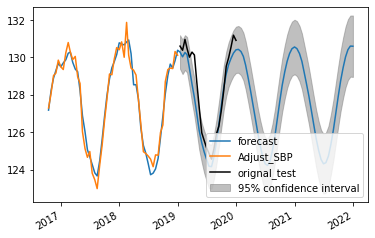

In [77]:
fig = result.plot_predict(start= "2016-10-15",end =" 2021-12-31")
plt.plot(data_test,color = "black",label = "orignal_test")
plt.legend(loc =0)

In [42]:
pred

Date
2016-10-15    127.778586
2016-10-31    128.093991
2016-11-15    128.132569
2016-11-30    129.311542
2016-12-15    129.710309
2016-12-31    129.421030
2017-01-15    129.709066
2017-01-31    129.919318
2017-02-15    130.843444
2017-02-28    130.491073
2017-03-15    129.501486
2017-03-31    129.438499
2017-04-15    129.424131
2017-04-30    127.942261
2017-05-15    126.918194
2017-05-31    125.638723
2017-06-15    125.144296
2017-06-30    124.736975
2017-07-15    124.294146
2017-07-31    124.087393
2017-08-15    123.747124
2017-08-31    124.098553
2017-09-15    125.620792
2017-09-30    126.779595
2017-10-15    128.098195
2017-10-31    128.188360
2017-11-15    128.965532
2017-11-30    130.193165
2017-12-15    130.569924
2017-12-31    130.703698
2018-01-15    130.634525
2018-01-31    130.655076
2018-02-15    131.349976
2018-02-28    130.708354
2018-03-15    129.642623
2018-03-31    128.403511
2018-04-15    129.035979
2018-04-30    127.917704
2018-05-15    126.448285
2018-05-31    124.97

In [9]:
arma_model = ARMA(data_train,(18,8))
result = arma_model.fit(disp=-1, method='css')
pred = result.predict()
pred_two = result.predict(start= "2019-01-01",end =" 2021-12-31")

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
# 残差检验
resid = result.resid 
plt.figure(figsize=(12,8))
qqplot(resid,line='q',fit=True)

print('D-W检验值为{}'.format(durbin_watson(resid.values)))

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid,ax=ax2)

r,q,p = sm.tsa.acf(resid.values.squeeze(),qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table= pd.DataFrame(data, columns=[ 'lag','AC','Q','Prob(>Q)'])
print(table.set_index('lag'))

D-W检验值为2.108910461179378
            AC          Q  Prob(>Q)
lag                                
1.0  -0.066327   0.251008  0.616366
2.0   0.054348   0.422774  0.809461
3.0   0.062179   0.652020  0.884427
4.0   0.103003   1.293693  0.862445
5.0  -0.012524   1.303372  0.934584
6.0   0.059318   1.525047  0.957813
7.0  -0.029811   1.582226  0.979326
8.0   0.026977   1.630069  0.990332
9.0   0.030733   1.693538  0.995440
10.0  0.009177   1.699326  0.998168
11.0 -0.098723   2.384732  0.996623
12.0 -0.078141   2.824367  0.996662
13.0 -0.030957   2.895051  0.998287
14.0  0.062173   3.187281  0.998694
15.0  0.047218   3.360159  0.999194
16.0 -0.100687   4.166921  0.998585
17.0 -0.009677   4.174575  0.999311
18.0 -0.021316   4.212743  0.999655
19.0  0.088654   4.891811  0.999515
20.0 -0.118473   6.140176  0.998695
21.0 -0.143829   8.035844  0.994990
22.0 -0.065722   8.444021  0.995773
23.0  0.026645   8.513274  0.997352
24.0 -0.038075   8.659404  0.998238
25.0 -0.067243   9.130899  0.998414
26.

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


<Figure size 864x576 with 0 Axes>

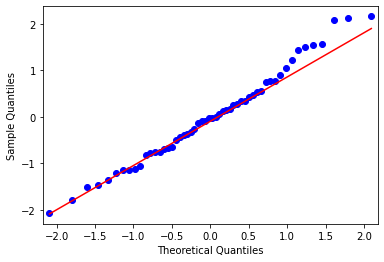

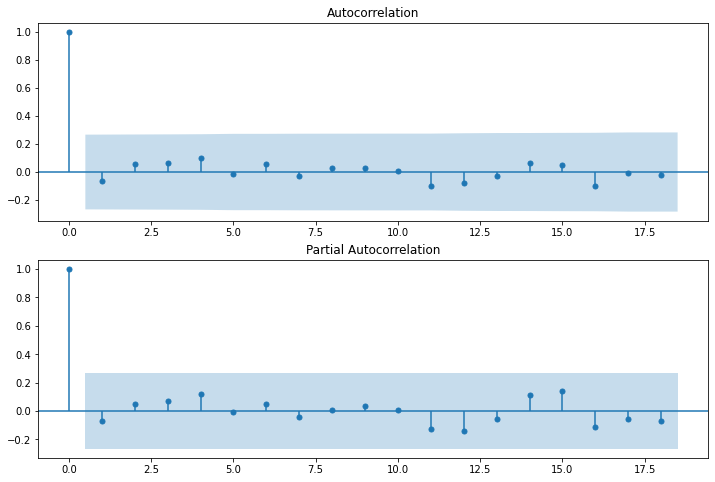

In [19]:
# 残差检验
resid = result.resid 
plt.figure(figsize=(12,8))
qqplot(resid,line='q',fit=True)

print('D-W检验值为{}'.format(durbin_watson(resid.values)))

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid,ax=ax2)

r,q,p = sm.tsa.acf(resid.values.squeeze(),qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table= pd.DataFrame(data, columns=[ 'lag','AC','Q','Prob(>Q)'])
print(table.set_index('lag'))

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:496: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


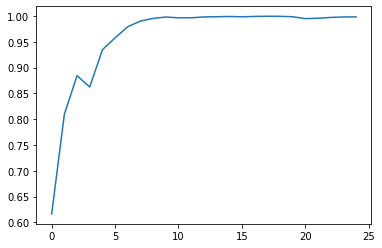

In [20]:
# p_value = acorr_ljungbox(resid, lags=20) 
# print ("白噪声检验p_value为{}".format(p_value))
plt.plot(lb_test(resid)[1])

### 血脂预测（胆固醇）

In [10]:
AdjustTc = pd.read_excel(r"C:\Users\13670\Desktop\待完成\006 时间序列模型\Tc\20201123Adjust_Tc.xlsx")

In [11]:
AdjustTc['Date'] = pd.to_datetime(AdjustTc['Date'])
AdjustTc = AdjustTc.set_index("Date")

<AxesSubplot:xlabel='Date'>

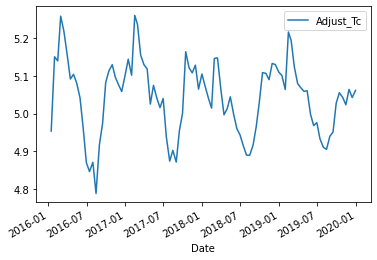

In [12]:
AdjustTc.plot()

In [25]:
# 1.平稳性检验 单位根检验（ADF、DF、PP） 如果序列是平稳的，则不存在单位根， 否则就会存在单位根
from statsmodels.tsa.stattools import adfuller

adfuller(AdjustTc)

(-4.938178090839658,
 2.9373303630934948e-05,
 10,
 85,
 {'1%': -3.5097356063504983,
  '5%': -2.8961947486260944,
  '10%': -2.5852576124567475},
 -254.49728002289112)

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:496: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


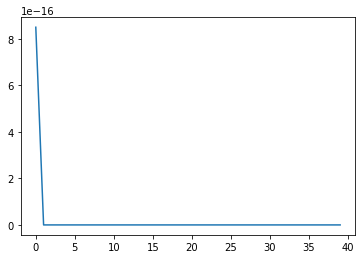

In [27]:
# 2.白噪声检验（纯随机性检验）, 白噪声序列，随机产生的序列，不具有时间上的相关性
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test

plt.plot(lb_test(AdjustTc)[1])

In [13]:
def Resampling(timeserise): 
    df = timeserise
    data = df['2016-1-1':'2019-01-01'] 
    test = df['2019-01-01':'2019-12-31']
    data_train = data.resample('SM').mean()  
    data_test = test.resample('SM').mean()
 
    return data_train,data_test

data_train1,data_test1 = Resampling(AdjustTc)

In [62]:
data_test1

,Adjust_Tc
Date,
2019-01-15,5.101411
2019-01-31,5.064202
2019-02-15,5.217072
2019-02-28,5.194375
2019-03-15,5.124541
2019-03-31,5.079386
2019-04-15,5.068675
2019-04-30,5.059086
2019-05-15,5.060869


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning

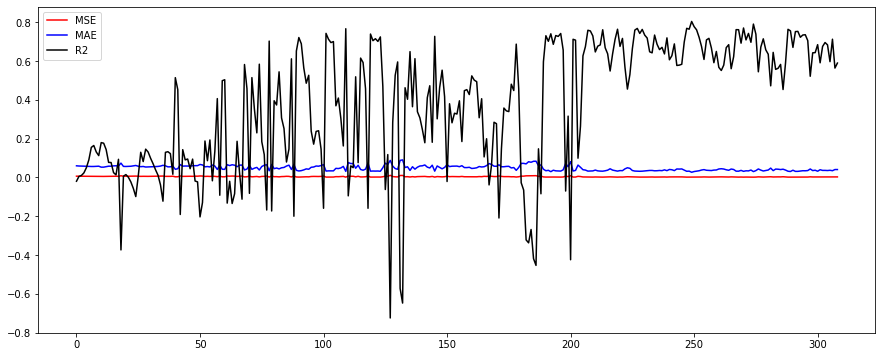

In [29]:
p_value = []
q_value = []
MSEList = []
MAEList= []
R2List = []

p_min = 0
q_min = 0
p_max = 20
q_max = 20

for p,q in itertools.product(range(p_min,p_max+1),range(q_min,q_max+1)):

    arma_model = ARMA(data_train,(p,q))
    try:
        result = arma_model.fit(disp=-1, method='css')
    except:
        continue 
    pred = result.predict()
    pred_one = result.predict(start= "2019-01-01",end =" 2019-12-31", \
                      dynamic=True)

    data_test_result = data_test['Adjust_Tc'].values
    pred_one_result = pred_one.values
 
    MSE = sklearn.metrics.mean_squared_error(data_test_result,pred_one_result)
    MAE = sklearn.metrics.mean_absolute_error(data_test_result,pred_one_result)
    R2 = sklearn.metrics.r2_score(data_test_result,pred_one_result)

    MSEList.append(MSE)
    MAEList.append(MAE)
    R2List.append(R2)
    p_value.append(p)
    q_value.append(q)

       
df = pd.DataFrame({'p':p_value,'q':q_value,'MSE':MSEList,'MAE':MAEList,'R2':R2List})

plt.figure(figsize=(15,6))
plt.plot(MSEList,'r',label='MSE')
plt.plot(MAEList,'b',label='MAE')
plt.plot(R2List,'k',label='R2')
plt.legend(loc=0) 
                  
MSE_min = df.loc[df.MSE== df.MSE.min(),:]
MAE_min = df.loc[df.MAE== df.MAE.min(),:]
R2_max = df.loc[df.R2== df.R2.max(),:]

In [30]:
MSE_min

,p,q,MSE,MAE,R2
249,18,2,0.001199,0.02653,0.803977


In [31]:
MAE_min

,p,q,MSE,MAE,R2
249,18,2,0.001199,0.02653,0.803977


In [32]:
R2_max

,p,q,MSE,MAE,R2
249,18,2,0.001199,0.02653,0.803977


C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


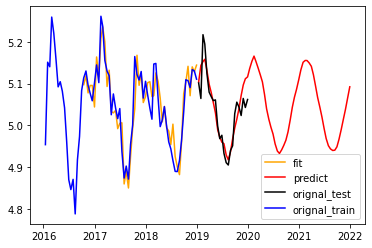

In [33]:
arma_model = ARMA(data_train,(18,2))
result = arma_model.fit(disp=-1, method='css')
pred = result.predict()
pred_two = result.predict(start= "2019-01-01",end =" 2021-12-31")

plt.plot(pred,color = "orange",label = "fit")
plt.plot(pred_two,color = "red", label = "predict")
plt.plot(data_test,color = "black",label = "orignal_test")
plt.plot(data_train,color = "blue", label = "orignal_train")
plt.legend(loc=0)

In [14]:
arma_model1 = ARMA(data_train1,(18,2))
result1 = arma_model1.fit(disp=-1, method='css')

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


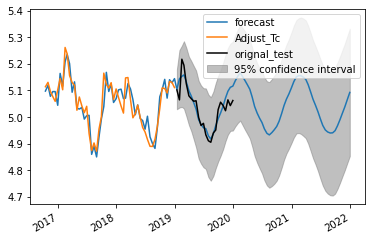

In [76]:
fig = result1.plot_predict(start= "2016-10-15",end =" 2021-12-31")
plt.plot(data_test1,color = "black",label = "orignal_test")
plt.legend(loc = 0)

D-W检验值为2.108910461179378
            AC          Q  Prob(>Q)
lag                                
1.0  -0.066327   0.251008  0.616366
2.0   0.054348   0.422774  0.809461
3.0   0.062179   0.652020  0.884427
4.0   0.103003   1.293693  0.862445
5.0  -0.012524   1.303372  0.934584
6.0   0.059318   1.525047  0.957813
7.0  -0.029811   1.582226  0.979326
8.0   0.026977   1.630069  0.990332
9.0   0.030733   1.693538  0.995440
10.0  0.009177   1.699326  0.998168
11.0 -0.098723   2.384732  0.996623
12.0 -0.078141   2.824367  0.996662
13.0 -0.030957   2.895051  0.998287
14.0  0.062173   3.187281  0.998694
15.0  0.047218   3.360159  0.999194
16.0 -0.100687   4.166921  0.998585
17.0 -0.009677   4.174575  0.999311
18.0 -0.021316   4.212743  0.999655
19.0  0.088654   4.891811  0.999515
20.0 -0.118473   6.140176  0.998695
21.0 -0.143829   8.035844  0.994990
22.0 -0.065722   8.444021  0.995773
23.0  0.026645   8.513274  0.997352
24.0 -0.038075   8.659404  0.998238
25.0 -0.067243   9.130899  0.998414
26.

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


<Figure size 864x576 with 0 Axes>

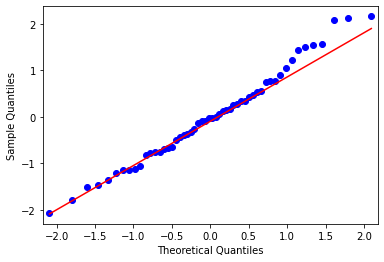

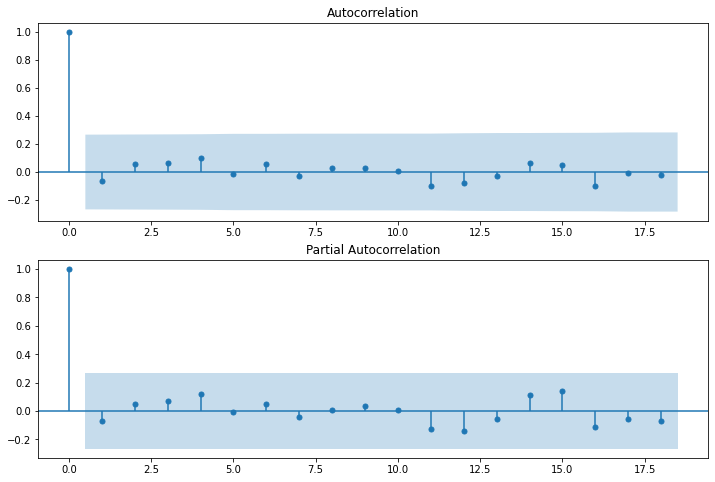

In [15]:
# 残差检验

### 使用qq图，检测是否符合正态分布
resid = result.resid 
plt.figure(figsize=(12,8))
qqplot(resid,line='q',fit=True)


### D-W检验，检验自相关性
"""
检验一阶自相关性。因为自相关系数ρ的值介于-1和1之间，所以0≤DW≤４。
DW＝O＝＞ρ＝１　　 即存在正自相关性 
DW＝４＜＝＞ρ＝－１　即存在负自相关性 
DW＝２＜＝＞ρ＝０　　即不存在（一阶）自相关性 
当DW值显著的接近于O或４时，则存在自相关性，而接近于２时，则不存在（一阶）自相关性
"""
print('D-W检验值为{}'.format(durbin_watson(resid.values)))

### ACF和PACF
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid,ax=ax2)


"""
prob值均大于0.05，残差序列不存在自相关性
"""
r,q,p = sm.tsa.acf(resid.values.squeeze(),qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table= pd.DataFrame(data, columns=[ 'lag','AC','Q','Prob(>Q)'])
print(table.set_index('lag'))

C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:496: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)
C:\Users\13670\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


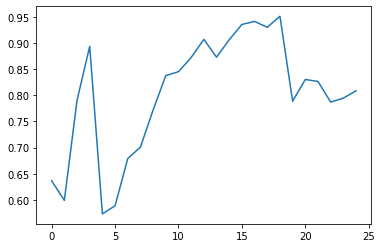

In [35]:
# p_value = acorr_ljungbox(resid, lags=20) 
# print ("白噪声检验p_value为{}".format(p_value))
plt.plot(lb_test(resid)[1])